In [6]:
import pandas as pd
from sqlalchemy import create_engine
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt

# Load env
load_dotenv()

DB_HOST = os.environ.get("DB_HOST")
DB_NAME = os.environ.get("DB_NAME")
DB_USER = os.environ.get("DB_USER")
DB_PASS = os.environ.get("DB_PASS")

# Create engine
engine = create_engine(f"mysql+mysqlconnector://{DB_USER}:{DB_PASS}@{DB_HOST}:3306/{DB_NAME}")

In [2]:
query = """
SELECT ai.impression_id, ai.user_id, ai.device, ai.clicked, a.category,
    a.ad_text,a.advertiser_id
FROM ad_impressions ai
JOIN ads a ON ai.ad_id = a.ad_id;
"""
df = pd.read_sql(query,engine)

In [5]:
ctr_per_category = df.groupby('category')['clicked'].mean().reset_index()
print(ctr_per_category)

  category   clicked
0  Fashion  0.095002
1  Finance  0.097460
2     Food  0.101240
3     Tech  0.095499
4   Travel  0.100224


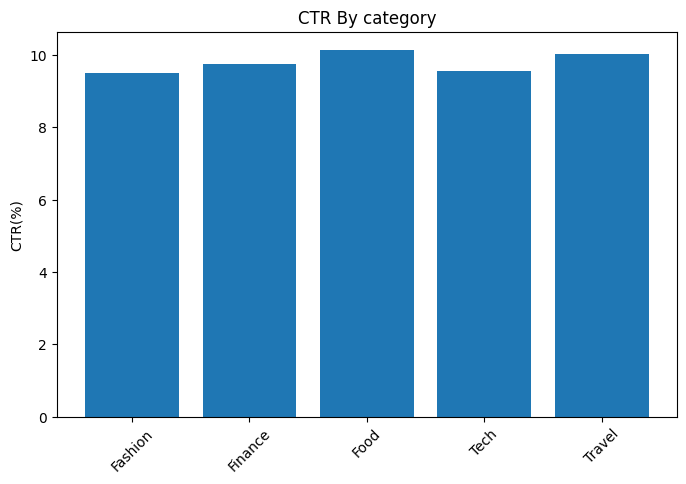

In [7]:
plt.figure(figsize=(8,5))
plt.bar(ctr_per_category['category'], ctr_per_category['clicked']*100)
plt.title("CTR By category")
plt.ylabel('CTR(%)')
plt.xticks(rotation=45)
plt.show()

In [9]:
ctr_by_device = df.groupby('category')['clicked'].mean().reset_index()
ctr_by_device['click_rate'] = ctr_by_device['clicked'] * 100
print(ctr_by_device)

  category   clicked  click_rate
0  Fashion  0.095002    9.500213
1  Finance  0.097460    9.745952
2     Food  0.101240   10.123999
3     Tech  0.095499    9.549929
4   Travel  0.100224   10.022356


In [15]:
df.groupby("device")["clicked"].mean()


device
Desktop    0.096594
Mobile     0.099633
Tablet     0.097536
Name: clicked, dtype: float64

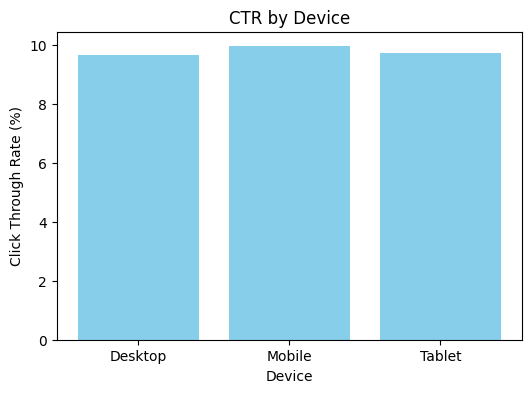

In [16]:
ctr_by_device = df.groupby("device")["clicked"].mean().reset_index()
ctr_by_device["click_rate"] = ctr_by_device["clicked"] * 100

plt.figure(figsize=(6,4))
plt.bar(ctr_by_device["device"], ctr_by_device["click_rate"], color="skyblue")
plt.title("CTR by Device")
plt.ylabel("Click Through Rate (%)")
plt.xlabel("Device")
plt.show()


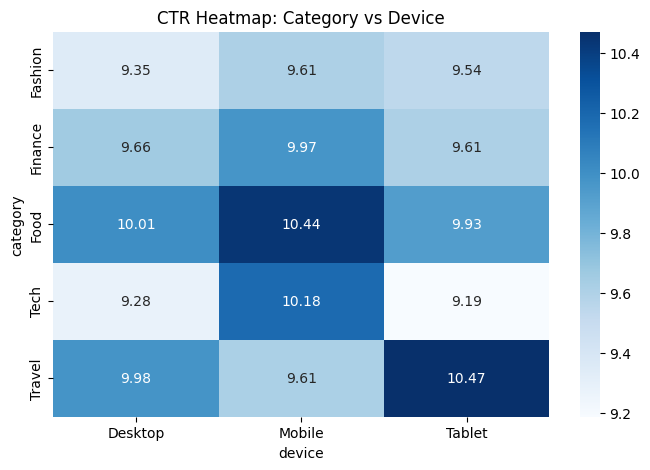

In [17]:
pivot = df.pivot_table(values="clicked", index="category", columns="device", aggfunc="mean")
import seaborn as sns
plt.figure(figsize=(8,5))
sns.heatmap(pivot*100, annot=True, fmt=".2f", cmap="Blues")
plt.title("CTR Heatmap: Category vs Device")
plt.show()


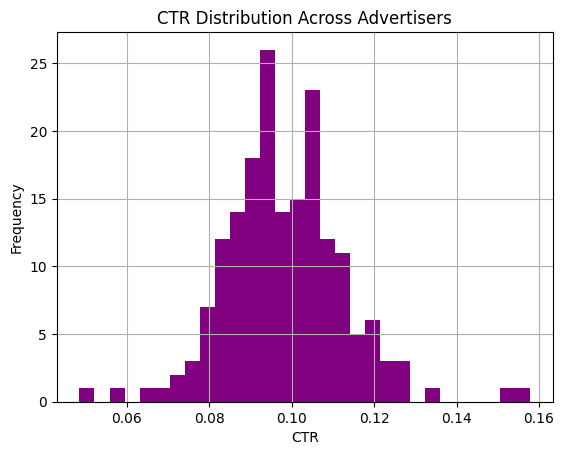

In [ ]:
ctr_by_adv = df.groupby("advertiser_id")["clicked"].mean()
ctr_by_adv.hist(bins=30, color="purple")
plt.title("CTR Distribution Across Advertisers")
plt.xlabel("CTR")
plt.ylabel("Frequency")
plt.show()